In [29]:
import pandas as pd
import seaborn as sns

In [30]:
df = pd.read_csv('german_credit_risk.csv', index_col =0)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [32]:
df["Job"] = df["Job"].astype('category')

In [33]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [34]:
df.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


<Axes: xlabel='Age', ylabel='Count'>

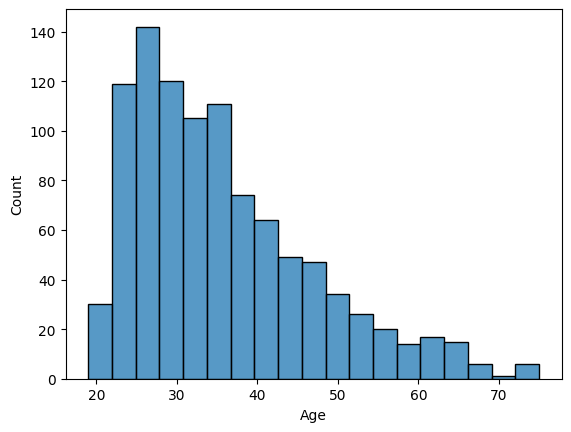

In [35]:
sns.histplot(df, x= "Age")

<Axes: xlabel='Age', ylabel='Count'>

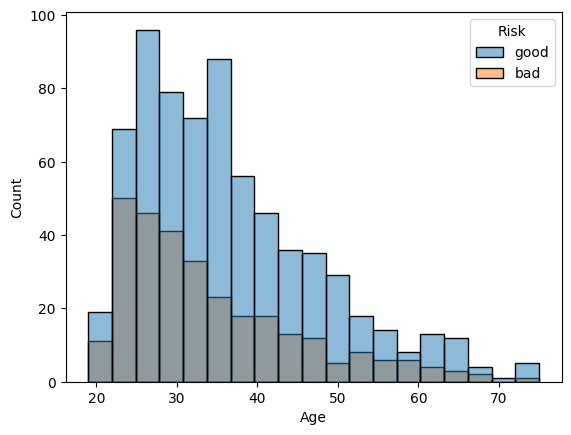

In [36]:
sns.histplot(df, x = 'Age', hue = 'Risk')

##### The higher the age, the lower the probability of bad credit risk

<Axes: xlabel='Age', ylabel='Count'>

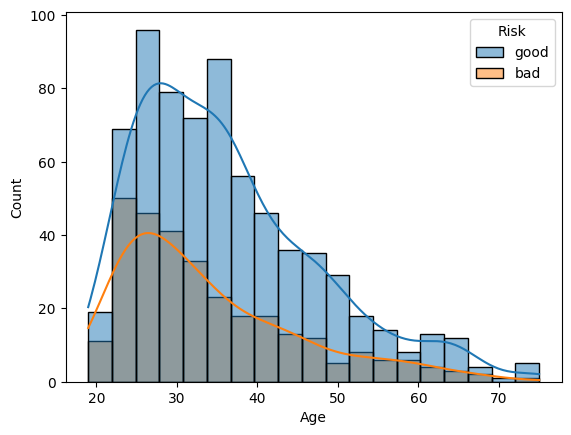

In [39]:
sns.histplot(df,
             x = 'Age',
             hue = 'Risk',
             kde= True)

<Axes: xlabel='Age', ylabel='Percent'>

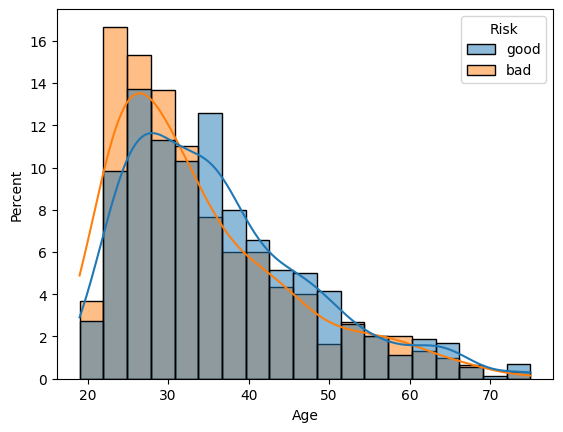

In [42]:
sns.histplot(df,
            x = 'Age',
            hue = 'Risk',
            kde = True,
            stat = 'percent',
            common_norm = False)

##### In the chart above, if we count the quantity, the age group 20-25 has a higher number of "good" cases. However, in this chart, we can see that the age group 20-25 has a higher "bad" rate than "good."
##### The image above clearly shows that younger customers tend to have a higher risk of bad credit.

<Axes: xlabel='Credit amount', ylabel='Percent'>

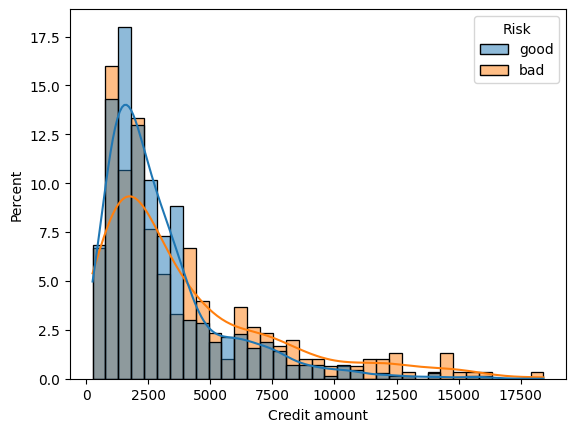

In [43]:
sns.histplot(df,
            x = 'Credit amount',
            hue = 'Risk',
            kde = True,
            stat = 'percent',
            common_norm = False)

##### From the image above, we can see that customers who borrow more money make up a significant proportion of the group with bad credit risk

In [47]:
df.groupby(['Purpose','Risk'])['Age'].count()

Purpose              Risk
business             bad      34
                     good     63
car                  bad     106
                     good    231
domestic appliances  bad       4
                     good      8
education            bad      23
                     good     36
furniture/equipment  bad      58
                     good    123
radio/TV             bad      62
                     good    218
repairs              bad       8
                     good     14
vacation/others      bad       5
                     good      7
Name: Age, dtype: int64

<Axes: xlabel='Sex', ylabel='Count'>

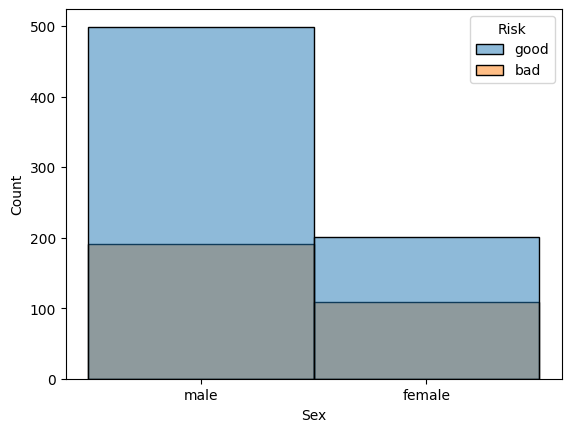

In [48]:
sns.histplot(df,
             x = 'Sex',
             hue = 'Risk')

<Axes: xlabel='Sex', ylabel='Proportion'>

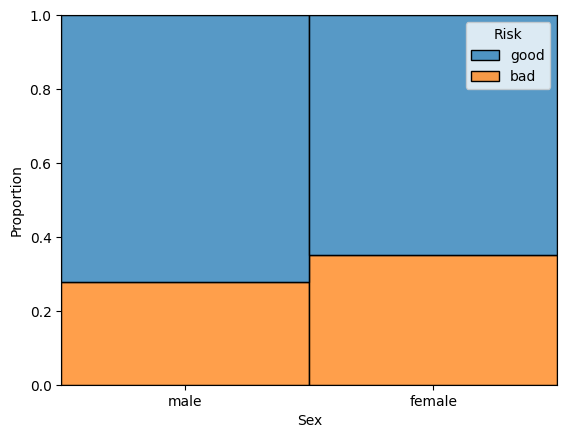

In [49]:
sns.histplot(df,
             x = 'Sex',
             hue = 'Risk', 
             stat = 'proportion',
             multiple = 'fill')

##### We can see that the rate of customers with bad credit is slightly higher in females than in males

<Axes: xlabel='Purpose', ylabel='Proportion'>

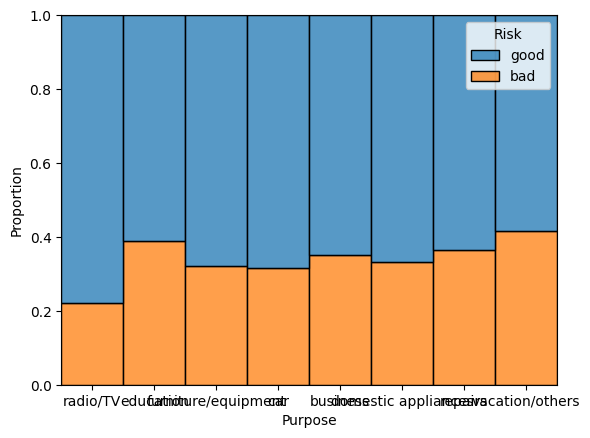

In [ ]:
sns.histplot(df,
             x = 'Purpose',
             hue = 'Risk', 
             stat = 'proportion',
             multiple = 'fill')


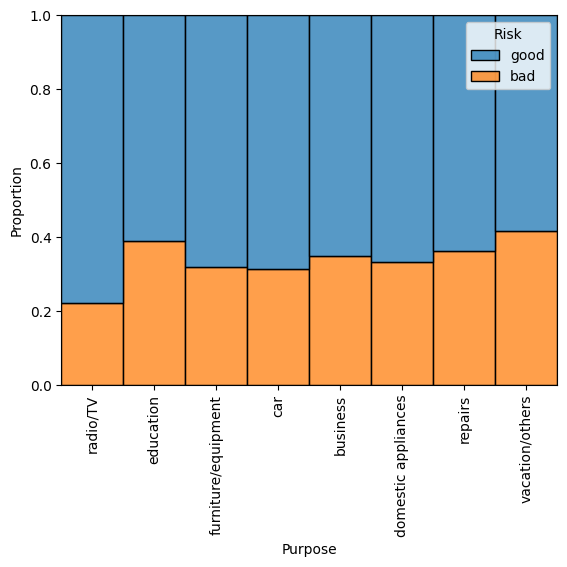

In [53]:
p = sns.histplot(df,
            x = 'Purpose',
            hue = 'Risk', 
            stat = 'proportion',
            multiple = 'fill')
for item in p.get_xticklabels():
    item.set_rotation(90)

##### From this, we can see that debt for radios/TVs is the safest, while debt for education is the riskiest

In [54]:
df_numerical =df.select_dtypes(include = ['number'])
df_numerical

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


In [56]:
import matplotlib.pyplot as plt

In [57]:
df_numerical.corr()

,Age,Credit amount,Duration
Age,1.000000,0.032716,-0.036136
Credit amount,0.032716,1.000000,0.624984
Duration,-0.036136,0.624984,1.000000


<Axes: >

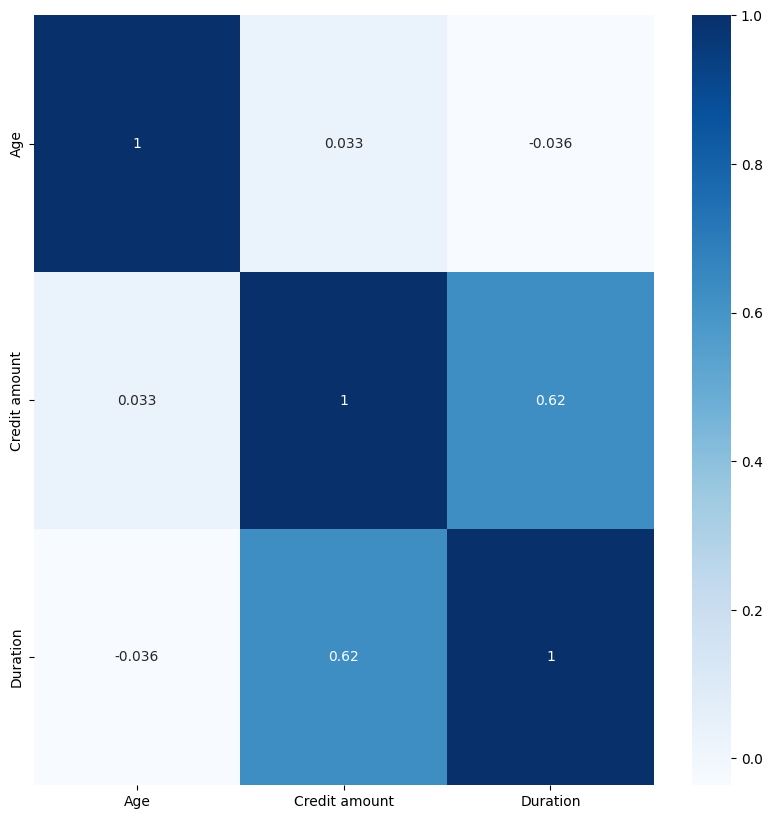

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(data =df_numerical.corr(), cmap = 'Blues', annot = True)